## Load File

In [11]:
# clear workspace
#rm(list = ls())

# change current directory
# setwd("C:/Users/Luise/Documents/jupyterprep/")

# load csv
filename <- 'exp1_a.csv'
data <- read.csv(filename, header = TRUE)

# drop first two, irrelevant, columns
data$X <- NULL
data$X.1 <- NULL

# make relevant coluns factors
data$ppt=factor(data$ppt)
data$qua=factor(data$qua)
data$dip=factor(data$dip)

In [12]:
library(dplyr)
sample_n(data, 5)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



,ppt,dv,qua,dip,dv_dp
138,11,0.22,1,2,0.4385715
57,4,0.11,2,2,0.1768811
80,6,0.31,2,1,1.0075496
60,4,0.13,3,2,0.4553954
133,11,0.81,0,0,1.9390641


## Missing Values

In [ ]:
# how many missing values for the different columns?
na <-sapply(data, function(x) sum(length(which(is.na(x)))))
na <- data.frame(na_count)
    na

In [ ]:
# remove all the rows that contain a missing value
data_na<-data[complete.cases(data), ]

In [ ]:
# remove all columns with at least one missing value
data_na<-data[,!apply(is.na(data), 2, any)]

In [ ]:
# replace NA with 0
data_na <- data
data_na[is.na(data_na)] <- 0

In [ ]:
# fill NA with column mean
data_na <- data
for(i in 1:ncol(data)){
  data_na[is.na(data_na[,i]), i] <- mean(data_na[,i], na.rm = TRUE)
}

## Initial plots & data summary

In [6]:
summary(data)

      ppt           dv              qua            dip        dv_dp        
 Min.   : 0   Min.   :0.0500   Min.   :0.00   Min.   :0   Min.   :-0.1233  
 1st Qu.: 3   1st Qu.:0.2200   1st Qu.:0.75   1st Qu.:0   1st Qu.: 0.5855  
 Median : 6   Median :0.3300   Median :1.50   Median :1   Median : 1.0027  
 Mean   : 6   Mean   :0.3841   Mean   :1.50   Mean   :1   Mean   : 1.0046  
 3rd Qu.: 9   3rd Qu.:0.5250   3rd Qu.:2.25   3rd Qu.:2   3rd Qu.: 1.3424  
 Max.   :12   Max.   :0.9500   Max.   :3.00   Max.   :2   Max.   : 2.9162  

In [12]:
head(aggregate(data, by=list(data$ppt), mean,simplify = TRUE))
#aggregate(data, by=list(data$dip,data$qua,data$ppt), mean,simplify = TRUE)

Group.1,ppt,dv,qua,dip,dv_dp
0,0,0.2712500,1.5,1,0.5906750
1,1,0.3791667,1.5,1,0.9778913
2,2,0.4616667,1.5,1,1.2720477
3,3,0.4750000,1.5,1,1.3275975
4,4,0.3672917,1.5,1,0.9368048
5,5,0.4375000,1.5,1,1.1995430


In [18]:
# get frequencies in categorical vars
# table(data$qua)
library(plyr)
count(data, 'qua')

qua,freq
0,39
1,39
2,39
3,39


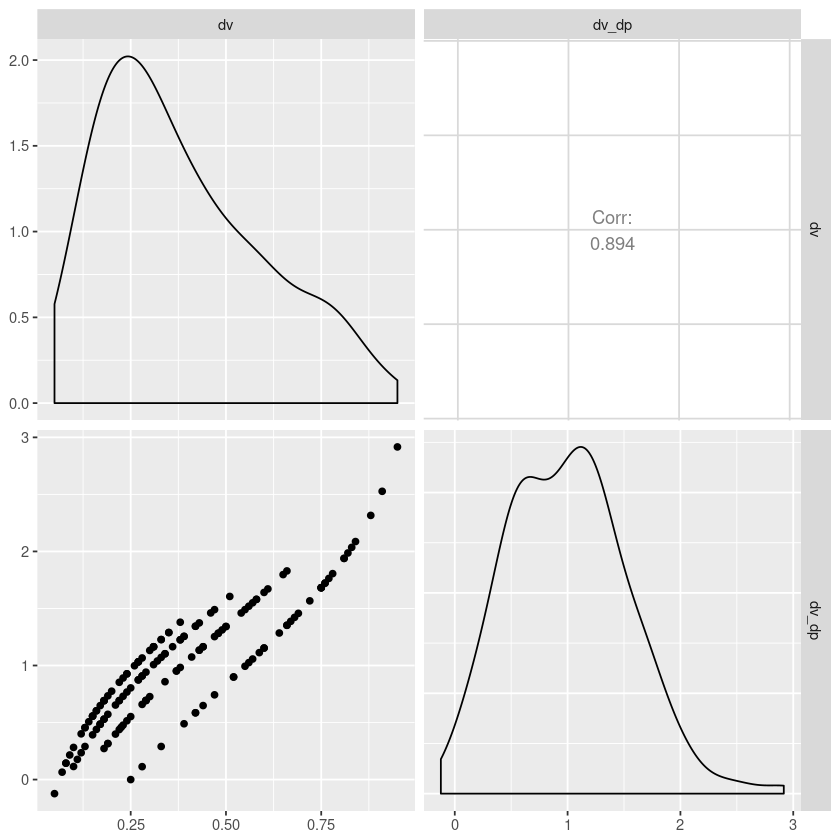

In [57]:
# plot continuous variable distributions and correlations
library(GGally)
ggpairs(data[, c("dv", "dv_dp")])

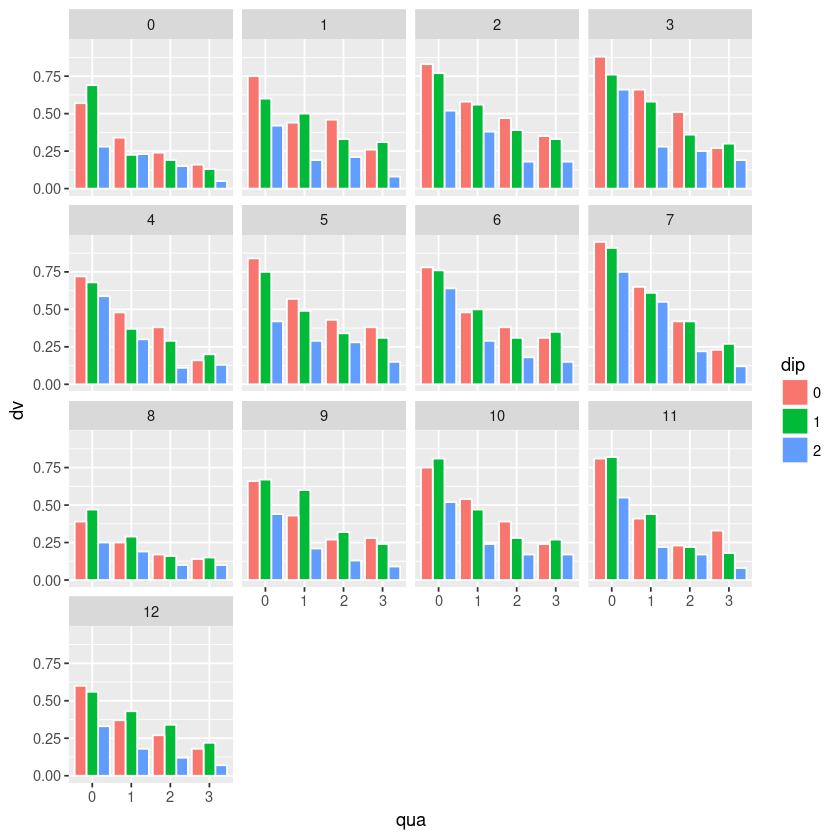

In [60]:
# cobine categorical variables in ggplot - example for per ppt plots
library(ggplot2)
ggplot(data, aes(x = qua, y = dv))+
  geom_bar(
    aes(fill = dip), stat = "identity", color = "white",
    position = position_dodge(0.9)
    )+
  facet_wrap(~ppt)

## Regular Expressions

In [5]:
text <- c("A","text is", "a text!")

# returns elements of vector that include the queried text
grep("text", text, perl=TRUE, value=TRUE) # value=FALSE for indices

# replace parts of strings, for regex expressions see python cookbook for more examples
sub("text", "", text, perl=TRUE)


[1] "text is" "a text!"

[1] "A"   " is" "a !"

## Prep for training

In [13]:
## set the seed for reproducability
set.seed(1)

data$logdv = sample(c(0,1), replace=TRUE, size=nrow(data))

# random indices
train_ind <- sample(seq_len(nrow(data)), size = round(0.8*nrow(data)))

train <- data[train_ind, ]
test <- data[-train_ind, ]

## Basic statistical tests - continous DV

Datasets for different samples

In [289]:
# adjust 
nppt<-100
data <- data.frame(
    dv=rnorm(nppt,0,1), # continuous dv
    subj=factor(seq(1,nppt)), # subj
    cond1= factor(rep(c(1,2),nppt/2)), # grouping variable 1
    cond2= factor(rep(c(1,2,3,4,5),(nppt/5))), # grouping variable 1
    cont1=rnorm(nppt,2,1), # continuous iv1
    cont2=rnorm(nppt,3,2) # continuous iv2
)

# repeated measures
nppt_rm<-10 # subj in rm design
ntrials<-20 # trials per cond in rm design
ncond1<-2 # levels of iv 1
ncond2<-3 # levels of IV 2
data_rm <- data.frame(
    dv=rnorm(nppt_rm*ntrials*ncond1*ncond2,0,1), # continuous dv
    subj=factor(rep(rep(sort(rep(seq(1,nppt_rm),ntrials)),ncond1),ncond2)), # subj
    trial=factor(rep(rep(rep(seq(1,ntrials),nppt_rm),ncond1),ncond2)),
    cond1=factor(rep(sort(rep(rep(seq(1,ncond1),ntrials),nppt_rm)),ncond2)),
    cond2=factor(sort(rep(rep(rep(seq(1,ncond2),ntrials),nppt_rm),ncond1)))
)
# ensure that there is 1 observation per cobination of all vars
counts<-count(data_rm, c('subj','trial','cond1','cond2'))
sum(counts$freq)==nppt_rm*ntrials*ncond1*ncond2

[1] TRUE

t-tests - independent samples

In [253]:
# introduce an effect into simulated data
data$dv[data$cond1==1]<-data$dv[df$cond1==1]+0.5

# assumption of normality (if not determined visually)
shapiro.test(data$dv[data$cond1==1])
shapiro.test(data$dv[data$cond1==2])

# assumption of equal variances
var.test(data$dv~data$cond1)

# parametric
t.test(data$dv~data$cond1,var.equal = TRUE) # alternative: t.test(data$dv[data$cond1==1],data$dv[data$cond1==2])
# for one sided tests: alternative = c("two.sided", "less", "greater")
# for one sample tests: mu = 0
# for welch test when vars unequal: var.equal = FALSE

# non-parametric
wilcox.test(data$dv~data$cond1) 


	Shapiro-Wilk normality test

data:  data$dv[data$cond1 == 1]
W = 0.97675, p-value = 0.4246



	Shapiro-Wilk normality test

data:  data$dv[data$cond1 == 2]
W = 0.97514, p-value = 0.3694



	F test to compare two variances

data:  data$dv by data$cond1
F = 0.89913, num df = 49, denom df = 49, p-value = 0.7113
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5102364 1.5844415
sample estimates:
ratio of variances 
         0.8991328 



	Two Sample t-test

data:  data$dv by data$cond1
t = 1.4675, df = 98, p-value = 0.1454
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1081648  0.7222366
sample estimates:
mean in group 1 mean in group 2 
     0.28119807     -0.02583786 



	Wilcoxon rank sum test with continuity correction

data:  data$dv by data$cond1
W = 1447, p-value = 0.1755
alternative hypothesis: true location shift is not equal to 0


t-tests - dependent samples

In [254]:
# aggregate data cross trials
df<-aggregate(dv ~ subj+cond1, data=data_rm, FUN=mean)
#count(df, c('subj','cond1'))

# introduce effect
df$dv[df$cond1==1]<-df$dv[df$cond1==1]+0.2

# pairwise differences normally distributed?
shapiro.test(df$dv[df$cond1==1]-df$dv[df$cond1==2])

# parametric
t.test(df$dv ~ df$cond1,var.equal=TRUE)

# non-parametric
wilcox.test(df$dv ~ df$cond1)


	Shapiro-Wilk normality test

data:  df$dv[df$cond1 == 1] - df$dv[df$cond1 == 2]
W = 0.95156, p-value = 0.687



	Two Sample t-test

data:  df$dv by df$cond1
t = 3.1091, df = 18, p-value = 0.006057
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.05827373 0.30114264
sample estimates:
mean in group 1 mean in group 2 
    0.176052484    -0.003655702 



	Wilcoxon rank sum test

data:  df$dv by df$cond1
W = 86, p-value = 0.005196
alternative hypothesis: true location shift is not equal to 0


Simulated p-value distributions for t-tests

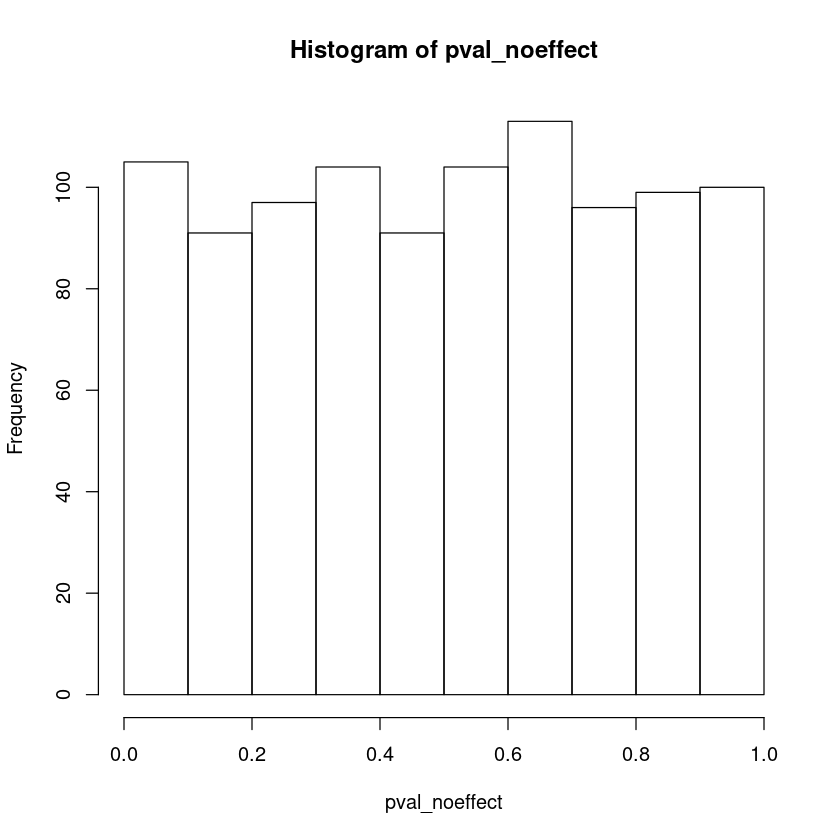

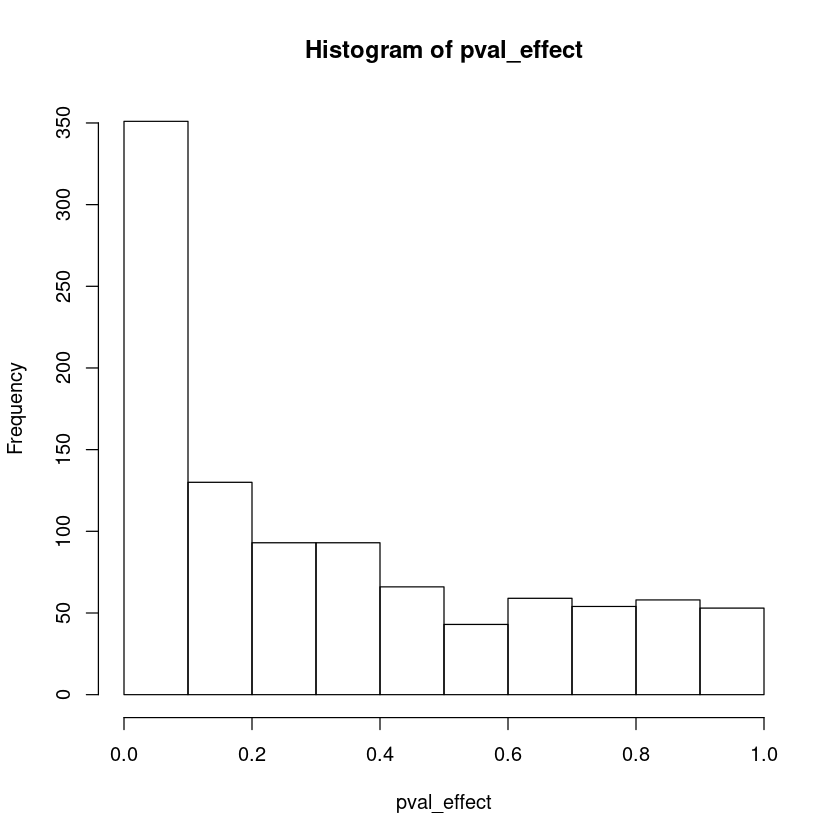

In [290]:
# adjust 
nppt<-100
data <- data.frame(
    dv=rnorm(nppt,0,1), # continuous dv
    subj=factor(seq(1,nppt)), # subj
    cond1= factor(rep(c(1,2),nppt/2)), # grouping variable 1
    cond2= factor(rep(c(1,2,3,4,5),(nppt/5))), # grouping variable 1
    cont1=rnorm(nppt,2,1), # continuous iv1
    cont2=rnorm(nppt,3,2) # continuous iv2
)

# quick resampling of the dv (no relationship with iv)
pval_noeffect<-NULL
for(i in 1:1000){
    data$dv <- rnorm(nppt,0,1) # continuous dv
    pval_noeffect<-c(pval_noeffect,t.test(data$dv[data$cond1==1],data$dv[data$cond1==2])$p.value)
}
hist(pval_noeffect)

# quick resampling of the dv (relationship with iv)
pval_effect<-NULL
for(i in 1:1000){
    data$dv[data$cond1==1] <- rnorm(length(data$dv[data$cond1==1]),0,4) # continuous dv
    data$dv[data$cond1==2] <- rnorm(length(data$dv[data$cond1==2]),1,4) # continuous dv
    pval_effect<-c(pval_effect,t.test(data$dv[data$cond1==1],data$dv[data$cond1==2])$p.value)
}
hist(pval_effect)

One-Way ANOVA (aov & ezANOVA)

In [291]:
# aov
res.aov <- aov(dv ~ cond2, data = data)
summary(res.aov)

#ez ANOVA also runs assumption tests!
library(ez)
anova = ezANOVA(
data = data
, dv = dv
, wid = subj
, between = cond2
)
print(anova)

            Df Sum Sq Mean Sq F value Pr(>F)
cond2        4   90.9   22.71   1.274  0.286
Residuals   95 1694.1   17.83               

Coefficient covariances computed by hccm()


$ANOVA
  Effect DFn DFd        F         p p<.05        ges
1  cond2   4  95 1.273779 0.2857695       0.05090275

$`Levene's Test for Homogeneity of Variance`
  DFn DFd     SSn      SSd         F         p p<.05
1   4  95 9.13938 529.4472 0.4099753 0.8010602      



One-Way RM ANOVA (aov & ezANOVA)

In [292]:
# aggregate data cross trials
df<-aggregate(dv ~ subj+cond2, data=data_rm, FUN=mean)

# aov
res.aov <- aov(dv ~ cond2+Error(subj/cond2), data = df)
summary(res.aov)

#ez ANOVA also runs assumption tests!
library(ez)
anova = ezANOVA(
data = df
, dv = dv
, wid = subj
, within = cond2
)
print(anova)


Error: subj
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  9 0.1116  0.0124               

Error: subj:cond2
          Df Sum Sq  Mean Sq F value Pr(>F)
cond2      2 0.0087 0.004352   0.178  0.838
Residuals 18 0.4392 0.024398               

$ANOVA
  Effect DFn DFd         F         p p<.05        ges
2  cond2   2  18 0.1783712 0.8380926       0.01555756

$`Mauchly's Test for Sphericity`
  Effect         W         p p<.05
2  cond2 0.9880779 0.9531576      

$`Sphericity Corrections`
  Effect       GGe     p[GG] p[GG]<.05      HFe     p[HF] p[HF]<.05
2  cond2 0.9882184 0.8357122           1.264626 0.8380926          



Two-Way ANOVA (aov & ezANOVA)

In [293]:
#aov
res.aov <- aov(dv ~ cond1*cond2, data = data)
summary(res.aov)

#ez ANOVA also runs assumption tests!
library(ez)
anova = ezANOVA(
data = data
, dv = dv
, wid = subj
, between = c(cond1,cond2)
)
print(anova)

            Df Sum Sq Mean Sq F value Pr(>F)  
cond1        1   64.9   64.86   3.637 0.0597 .
cond2        4   90.9   22.71   1.274 0.2862  
cond1:cond2  4   24.3    6.09   0.341 0.8494  
Residuals   90 1604.9   17.83                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Coefficient covariances computed by hccm()


$ANOVA
       Effect DFn DFd         F          p p<.05        ges
1       cond1   1  90 3.6370533 0.05969645       0.03884203
2       cond2   4  90 1.2738085 0.28619723       0.05358033
3 cond1:cond2   4  90 0.3412858 0.84941864       0.01494162

$`Levene's Test for Homogeneity of Variance`
  DFn DFd      SSn      SSd         F         p p<.05
1   9  90 24.96743 594.8694 0.4197128 0.9214825      



Two-Way RM ANOVA (aov & ezANOVA)

In [295]:
# aggregate data cross trials
df<-aggregate(dv ~ subj+cond1+cond2, data=data_rm, FUN=mean)
#count(df, c('cond1','cond2'))

#aov
res.aov <- aov(dv ~ cond1*cond2 + Error(subj/(cond1*cond2)), data = df)
summary(res.aov)

#ez ANOVA also runs assumption tests!
library(ez)
anova = ezANOVA(
data = df
, dv = dv
, wid = subj
, within = c(cond1,cond2)
)
print(anova)


Error: subj
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  9 0.2232  0.0248               

Error: subj:cond1
          Df Sum Sq Mean Sq F value Pr(>F)
cond1      1 0.0939 0.09391   1.615  0.236
Residuals  9 0.5234 0.05816               

Error: subj:cond2
          Df Sum Sq Mean Sq F value Pr(>F)
cond2      2 0.0174  0.0087   0.178  0.838
Residuals 18 0.8783  0.0488               

Error: subj:cond1:cond2
            Df Sum Sq Mean Sq F value Pr(>F)
cond1:cond2  2 0.0735 0.03676   1.524  0.245
Residuals   18 0.4342 0.02412               

$ANOVA
       Effect DFn DFd         F         p p<.05         ges
2       cond1   1   9 1.6147631 0.2356857       0.043616687
3       cond2   2  18 0.1783712 0.8380926       0.008383019
4 cond1:cond2   2  18 1.5237421 0.2447095       0.034470955

$`Mauchly's Test for Sphericity`
       Effect         W         p p<.05
3       cond2 0.9880779 0.9531576      
4 cond1:cond2 0.7152789 0.2617590      

$`Sphericity Corrections`
       Effect       GGe     p[GG] p[GG]<.05       HFe     p[HF] p[HF]<.05
3       cond2 0.9882184 0.8357122           1.2646264 0.8380926          
4 cond1:cond2 0.7783790 0.2488603           0.9114026 0.2466335          

